# Covid data exploration



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [11]:
dataset = pd.read_csv('daily_diabetes.csv', index_col=0)
dataset.shape

(365, 4)

In [12]:
dataset.head()

,All_Causes,Diabetes,Ozone,Temperature
Date,,,,
2014-01-01,1418,15,54.285472,6.966667
2014-02-01,1485,17,62.274416,7.200000
2014-03-01,1456,25,34.028751,7.600000
2014-04-01,1448,13,35.512845,6.366667
2014-05-01,1411,20,62.606071,5.200000


## pearson correlation

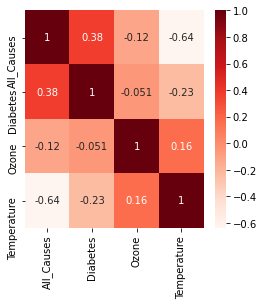

Date
2014-01-01    15
2014-02-01    17
2014-03-01    25
2014-04-01    13
2014-05-01    20
              ..
2014-12-27    18
2014-12-28    19
2014-12-29    24
2014-12-30    19
2014-12-31    18
Name: Diabetes, Length: 365, dtype: int64

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(4,4))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['Diabetes'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

## Feature selection com SelectKBest

In [16]:
df_data = dataset.drop(columns='Diabetes')
df_label = dataset['Diabetes']

In [18]:
# Feature extraction
test = SelectKBest(score_func=chi2,k=3)
fit = test.fit_transform(df_data, df_label)

In [19]:
fit[:19]

array([[1418.        ,   54.28547192,    6.96666667],
       [1485.        ,   62.27441556,    7.2       ],
       [1456.        ,   34.02875056,    7.6       ],
       [1448.        ,   35.51284486,    6.36666667],
       [1411.        ,   62.60607139,    5.2       ],
       [1536.        ,   54.99867722,    6.03333333],
       [1460.        ,   39.3349255 ,    8.83333333],
       [1448.        ,   40.25696806,    8.36666667],
       [1441.        ,   32.97996917,    7.36666667],
       [1412.        ,   31.41896042,    6.5       ],
       [1416.        ,   47.92339417,    6.        ],
       [1411.        ,   17.19821153,    3.53333333],
       [1429.        ,   38.61881917,    4.9       ],
       [1377.        ,   35.68192419,    5.63333333],
       [1477.        ,   40.08807042,    5.66666667],
       [1425.        ,   43.93208167,    7.2       ],
       [1328.        ,   44.51241694,    6.46666667],
       [1366.        ,   31.91616847,    6.26666667],
       [1298.        ,   28.

In [20]:
df_data[:19]

,All_Causes,Ozone,Temperature
Date,,,
2014-01-01,1418,54.285472,6.966667
2014-02-01,1485,62.274416,7.200000
2014-03-01,1456,34.028751,7.600000
2014-04-01,1448,35.512845,6.366667
2014-05-01,1411,62.606071,5.200000
2014-06-01,1536,54.998677,6.033333
2014-07-01,1460,39.334926,8.833333
2014-08-01,1448,40.256968,8.366667
2014-09-01,1441,32.979969,7.366667


## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
All_Causes
Diabetes
Ozone


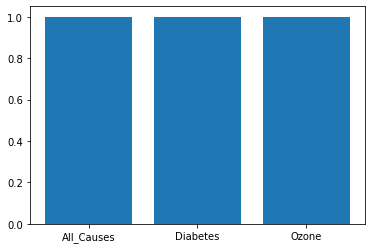

In [21]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=3)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

In [22]:
df_data.columns

Index(['All_Causes', 'Ozone', 'Temperature'], dtype='object')